In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("telecom_churn.csv")

# Example cleanup
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df = df.dropna()

# DO NOT do get_dummies here
df.to_csv("telecom_churn_processed.csv", index=False)

In [7]:
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Dataset Shape: (5000, 15)

First 5 rows:
  CustomerID  Gender  SeniorCitizen Partner Dependents  Tenure PhoneService  \
0  CUST00000    Male              0      No        Yes      61          Yes   
1  CUST00001  Female              0      No         No      68          Yes   
2  CUST00002    Male              0      No         No      62           No   
3  CUST00003    Male              1     Yes         No       1          Yes   
4  CUST00004    Male              0     Yes        Yes      53          Yes   

  InternetService       OnlineSecurity        Contract PaperlessBilling  \
0              No  No internet service  Month-to-month              Yes   
1     Fiber optic  No internet service  Month-to-month              Yes   
2             DSL  No internet service        One year               No   
3     Fiber optic                  Yes  Month-to-month              Yes   
4     Fiber optic                  Yes  Month-to-month              Yes   

      PaymentMethod  MonthlyCharg

In [8]:
df = df.rename(columns={"CHURN": "Churn"})


In [9]:
print(df.columns.tolist())


['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure', 'PhoneService', 'InternetService', 'OnlineSecurity', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [10]:
# # Normalize column names
# df.columns = df.columns.str.strip().str.lower()

# # Now safely select target
# if 'churn' in df.columns:
#     y = df['churn']
# else:
#     raise ValueError("❌ Churn column not found in dataframe")


In [11]:
print("\nColumn Names and Types:")
print(df.dtypes)


Column Names and Types:
CustomerID           object
Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
InternetService      object
OnlineSecurity       object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [12]:


print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
InternetService     0
OnlineSecurity      0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [13]:
print("\nChurn Distribution:")
print(df['Churn'].value_counts())


Churn Distribution:
Churn
No     3990
Yes    1010
Name: count, dtype: int64


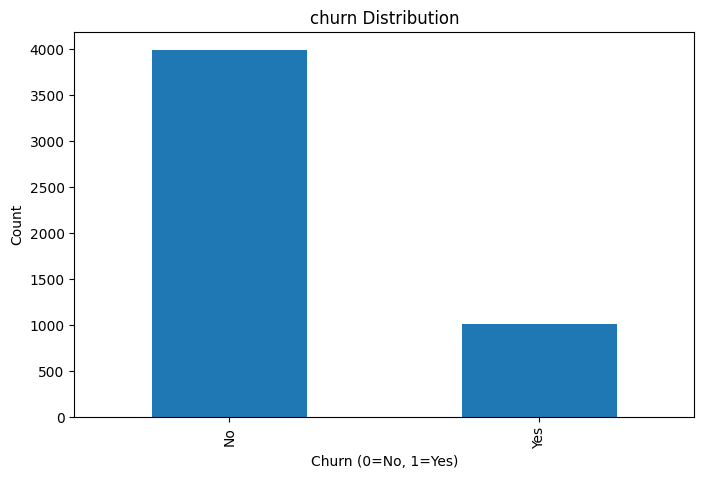

In [14]:
plt.figure(figsize=(8, 5))
df['Churn'].value_counts().plot(kind='bar')
plt.title('churn Distribution')
plt.xlabel('Churn (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()


In [15]:
print("\nNumeric Columns Summary:")
print(df.describe())


Numeric Columns Summary:
       SeniorCitizen       Tenure  MonthlyCharges  TotalCharges
count    5000.000000  5000.000000     5000.000000   5000.000000
mean        0.154400    35.687200       67.607612   4268.129228
std         0.361368    20.817023       29.000802   2435.644099
min         0.000000     0.000000       18.010000     18.890000
25%         0.000000    17.000000       41.955000   2160.805000
50%         0.000000    36.000000       67.235000   4316.100000
75%         0.000000    54.000000       93.150000   6341.812500
max         1.000000    71.000000      118.000000   8498.650000


In [23]:
feature_cols = [
    "SeniorCitizen",
    "Tenure",
    "MonthlyCharges",
    "TotalCharges"
]

target_col = "Churn"


In [25]:
X = df[feature_cols]
y = df[target_col]


In [24]:
print("Available columns:", df.columns.tolist())
print("Expected features:", feature_cols)


Available columns: ['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure', 'PhoneService', 'InternetService', 'OnlineSecurity', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
Expected features: ['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges']


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

feature_cols = [
    "SeniorCitizen",
    "Tenure",
    "MonthlyCharges",
    "TotalCharges"
]

target_col = "Churn"

X = df[feature_cols]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [29]:
preds = model.predict(X)


In [31]:
print(type(df))
print(feature_cols)
print(model)


<class 'pandas.core.frame.DataFrame'>
['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges']
LogisticRegression(max_iter=1000)


In [32]:
X = df[feature_cols]


In [33]:
print("Available columns:", df.columns.tolist())
print("Expected features:", feature_cols)


Available columns: ['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure', 'PhoneService', 'InternetService', 'OnlineSecurity', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
Expected features: ['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges']
